In [6]:
import bs4
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def get_basketball_stats(link):
    try:
        response = requests.get(link)
        response.raise_for_status()  # Raise an exception for HTTP errors
        soup = bs4.BeautifulSoup(response.text, 'html.parser')
        table = soup.find(class_='wikitable sortable')
        if table is None:
            raise ValueError("Unable to find the table with class 'wikitable sortable'")
        
        headers = table.tr
        titles = headers.find_all("abbr")
        data = {title['title']: [] for title in titles}

        for row in table.find_all('tr')[1:]:
            for key, a in zip(data.keys(), row.find_all("td")[2:]):
                value = ''.join(c for c in a.text if (c.isdigit() or c == "."))
                if value == '':
                    value = np.nan
                data[key].append(value)

        Min = min([len(x) for x in data.values()])
        for key in data.keys():
            data[key] = list(map(lambda x: float(x), data[key][:Min]))

        return data
    except requests.exceptions.RequestException as e:
        print("Error fetching data:", e)
        return None
    except Exception as e:
        print("Error:", e)
        return None

In [8]:
links=['https://en.wikipedia.org/wiki/Michael_Jordan'\
       ,'https://en.wikipedia.org/wiki/Kobe_Bryant'\
      ,'https://en.wikipedia.org/wiki/LeBron_James'\
      ,'https://en.wikipedia.org/wiki/Stephen_Curry'\
      ,'https://en.wikipedia.org/wiki/Kevin_Durant'\
      ,'https://en.wikipedia.org/wiki/Tim_Duncan'\
      ,'https://en.wikipedia.org/wiki/Shaquille_O%27Neal'\
      ,'https://en.wikipedia.org/wiki/Larry_Bird'\
      ,'https://en.wikipedia.org/wiki/Magic_Johnson'\
      ,'https://en.wikipedia.org/wiki/Kareem_Abdul-Jabbar']

names=['Michael Jordan','Kobe Bryant','Lebron James','Stephen Curry',\
       'Kevin Durant','Tim Duncan','Shaquille O\'Neal','Larry Bird',\
       'Magic Johnson','Kareem Abdul-Jabbar']

players_data = {}
for i, link in enumerate(links):
    data = get_basketball_stats(link)
    if data:
        players_data[names[i]] = data

players_df = {}
for player, data in players_data.items():
    players_df[player] = pd.DataFrame(data)

for player, df in players_df.items():
    print(player)
    print(df.to_string(index=False))
    print()

Error: could not convert string to float: '...'
Michael Jordan
 Games played  Games started  Minutes per game  Field goal percentage  3-point field-goal percentage  Free-throw percentage  Rebounds per game  Assists per game  Steals per game  Blocks per game  Points per game
         82.0           82.0              38.3                  0.515                          0.173                  0.845                6.5               5.9              2.4              0.8             28.2
         18.0            7.0              25.1                  0.457                          0.167                  0.840                3.6               2.9              2.1              1.2             22.7
         82.0           82.0              40.0                  0.482                          0.182                  0.857                5.2               4.6              2.9              1.5             37.1
         82.0           82.0              40.4                  0.535                    

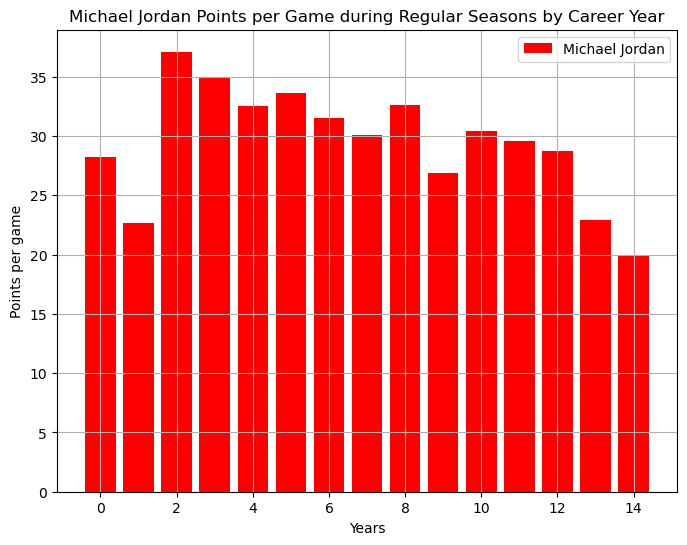

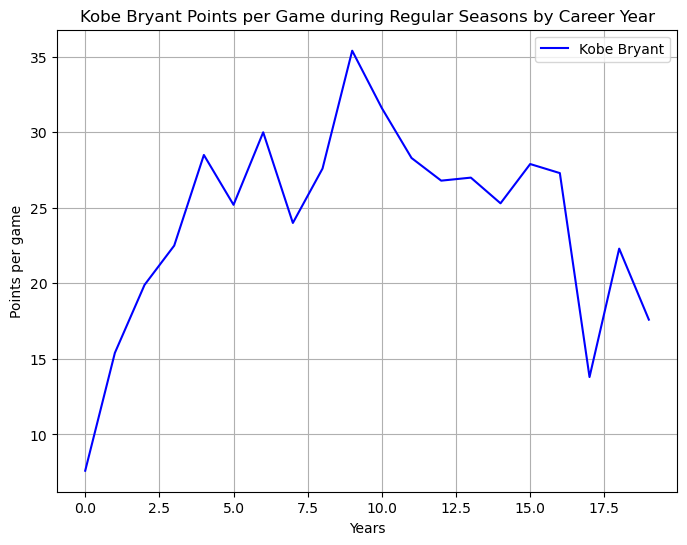

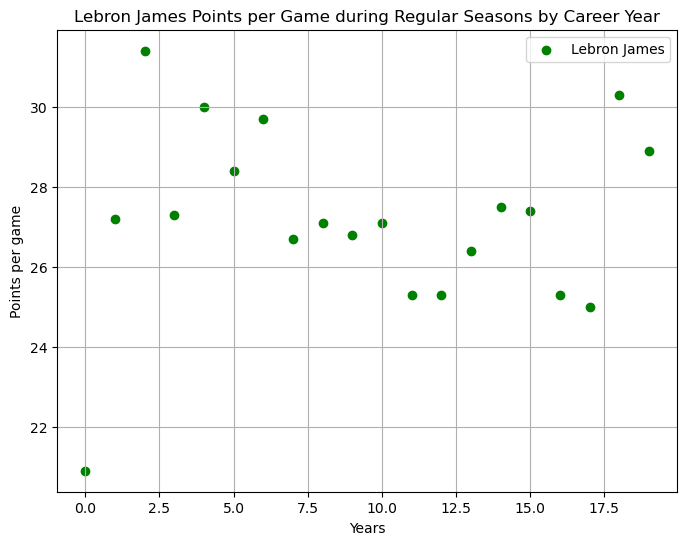

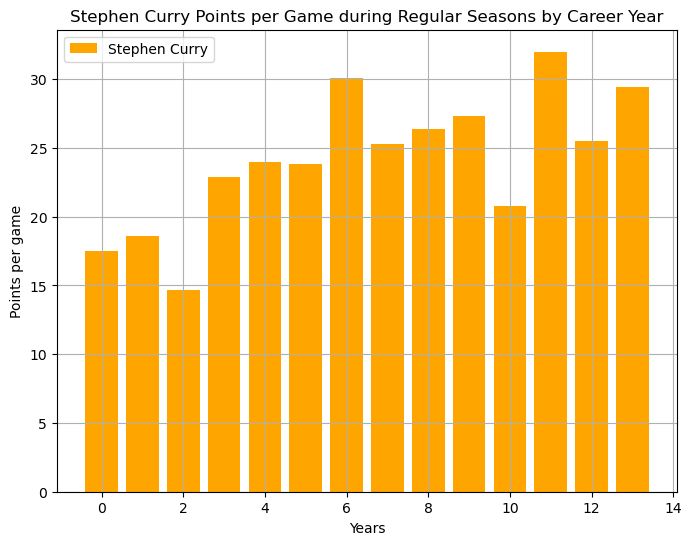

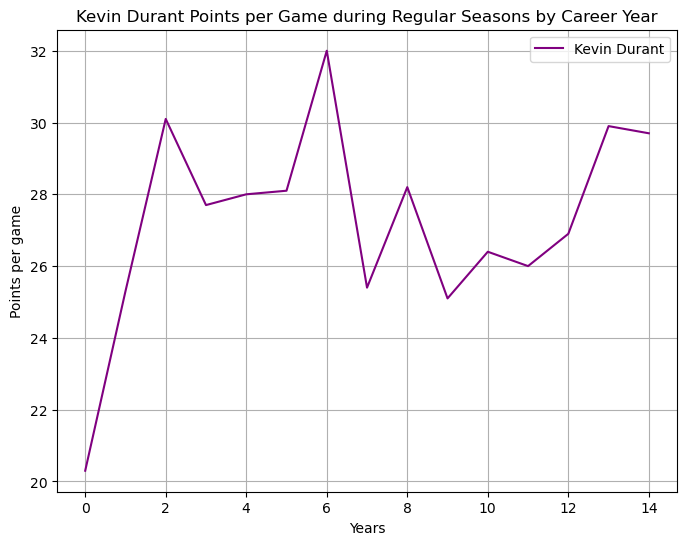

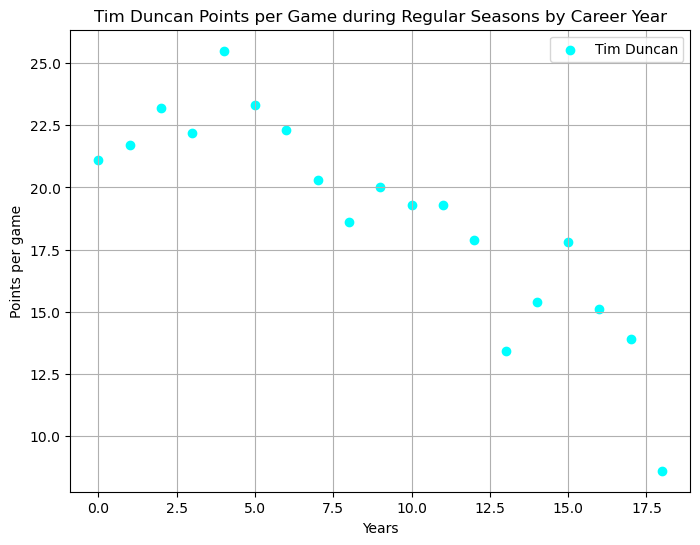

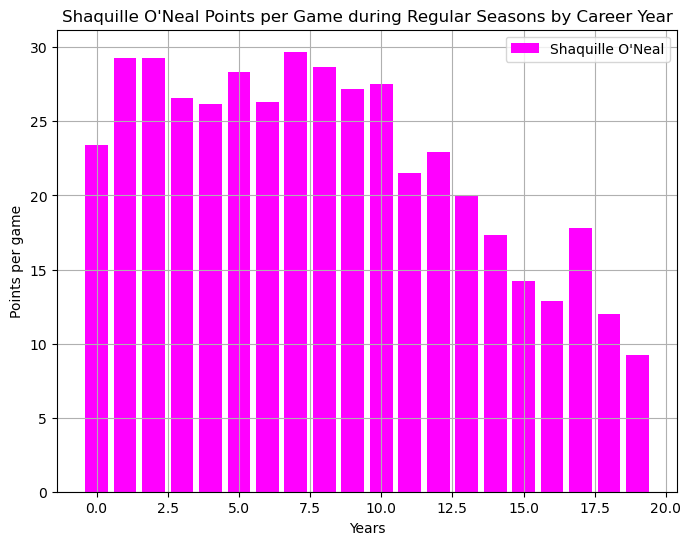

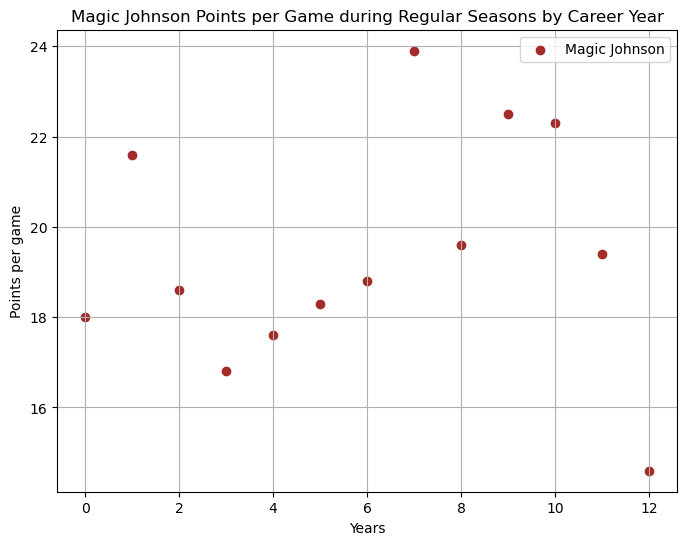

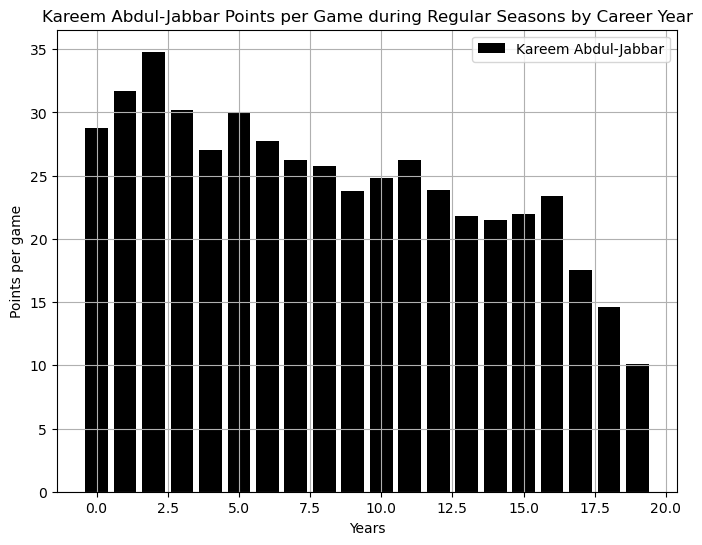

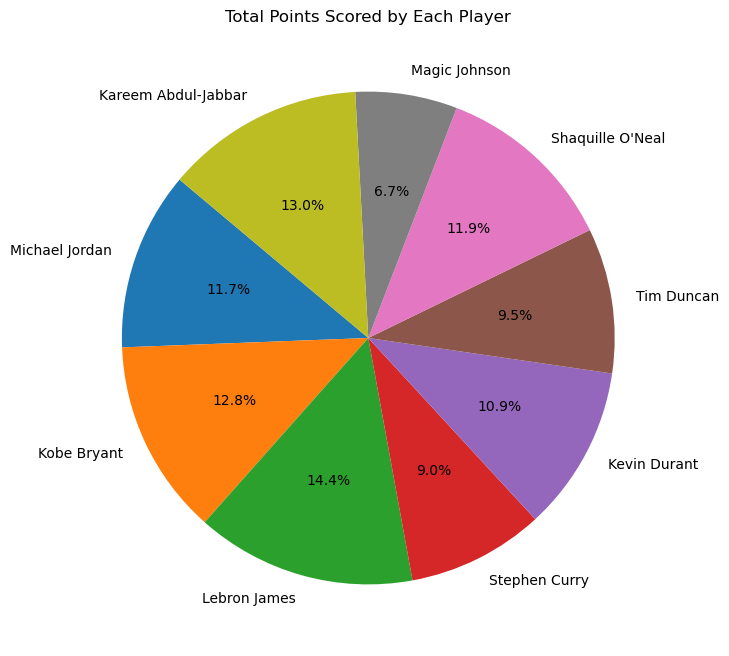

In [11]:
# Define the styles of plots for each player
player_styles = {
    'Michael Jordan': {'style': 'bar', 'color': 'red'},
    'Kobe Bryant': {'style': 'line', 'color': 'blue'},
    'Lebron James': {'style': 'scatter', 'color': 'green'},
    'Stephen Curry': {'style': 'bar', 'color': 'orange'},
    'Kevin Durant': {'style': 'line', 'color': 'purple'},
    'Tim Duncan': {'style': 'scatter', 'color': 'cyan'},
    'Shaquille O\'Neal': {'style': 'bar', 'color': 'magenta'},
    'Larry Bird': {'style': 'line', 'color': 'yellow'},
    'Magic Johnson': {'style': 'scatter', 'color': 'brown'},
    'Kareem Abdul-Jabbar': {'style': 'bar', 'color': 'black'}
}

# Calculate total points for each player
total_points = {player: df['Points per game'].sum() for player, df in players_df.items()}

# Plot individual player statistics
for player, df in players_df.items():
    plt.figure(figsize=(8, 6))
    
    # Get the style and color for the current player
    style = player_styles.get(player, {'style': 'line', 'color': 'black'})['style']
    color = player_styles.get(player, {'style': 'line', 'color': 'black'})['color']
    
    if style == 'bar':
        plt.bar(df.index, df['Points per game'], label=player, color=color)
    elif style == 'line':
        plt.plot(df.index, df['Points per game'], label=player, color=color)
    elif style == 'scatter':
        plt.scatter(df.index, df['Points per game'], label=player, color=color)
    
    plt.xlabel('Years')
    plt.ylabel('Points per game')
    plt.title(f'{player} Points per Game during Regular Seasons by Career Year')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot pie chart for total points
plt.figure(figsize=(8, 8))
plt.pie(total_points.values(), labels=total_points.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Total Points Scored by Each Player')
plt.show()